# 2D Pathfinding on Binary Images
Implementation of a solution for the take-home Python interview problem:
- Determine whether a path exists between two points over black pixels.
- Visualize a path if it exists.
- Find two disjoint paths given two start-end pairs.

In [ ]:
#Some needed libraries
import numpy as np
from collections import deque
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
# This block of code imports the .png files from github
# The files will be stored in /content/ directory of the google colab
import os
import requests

def download_file(url, filename):
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"Downloaded {filename}")

# Define the base URL and filenames
# Corrected base URL based on the user's repository reference
base_url = "https://raw.githubusercontent.com/mcollinswisc/2D_paths/4cc8b973bfea1bc7906b29d6dbb11845028f1dc7/"
files_to_download = ["small-ring.png", "polygons.png", "bars.png"]

# Download the files
for filename in files_to_download:
    url = base_url + filename
    download_file(url, filename)

Downloaded small-ring.png
Downloaded polygons.png
Downloaded bars.png


In [ ]:
# This block of code defines the pixel information for the given image.
# Binary image representation where black pixels are 1 and white pixels are 0, # This representation is suitable for pathfinding algorithms
#that operate on traversable (black) and non-traversable (white) areas.\

def load_binary_image(path):
    img = Image.open(path).convert("L") # To convert the image file to gray scale using 'L'
    img_array = np.array(img)
    return (img_array < 128).astype(np.uint8)  # black=1, white=0


In [ ]:
'''This code block defines the bfs_path function, which implements the Breadth-First Search (BFS) algorithm to find a path between a start and end point in a 2D grid represented by the universe numpy array.
'''

''' This code block starts with start point and traverses the grid in a 4-connected manner representing 4 directions uo, down, left and right)
'''

''' I used a deque to start the queue and update it as the path traverses across the image'''


def bfs_path(universe, start, end):
    h, w = universe.shape
    visited = np.zeros_like(universe, dtype=bool)
    parent = {}

    queue = deque([start])
    visited[start] = True

    dirs = [(-1,0), (1,0), (0,-1), (0,1)]  # 4-connected

    while queue:
        curr = queue.popleft()
        if curr == end:
            path = [curr]
            while curr in parent:
                curr = parent[curr]
                path.append(curr)
            return path[::-1]
        for d in dirs:
            ny, nx = curr[0] + d[0], curr[1] + d[1]
            if 0 <= ny < h and 0 <= nx < w:
                if not visited[ny, nx] and universe[ny, nx] == 1:
                    visited[ny, nx] = True
                    parent[(ny, nx)] = curr
                    queue.append((ny, nx))
    return None


In [1]:
'''
This code block defines the find_two_disjoint_paths function, which attempts to find two paths between two different start and end point pairs (start1(s1) to end1(e1) and start2(s2) to end2(e2)) in a given universe (binary image), such that the two paths do not share any common pixels.
'''

def draw_path(universe, path, out_path='output.png'):
    img = np.stack([universe*255]*3, axis=-1).astype(np.uint8)
    for y, x in path:
        img[y, x] = [255, 0, 0]  # red path
    Image.fromarray(img).save(out_path)
    plt.imshow(img)
    plt.title("Path Visualization")
    plt.axis("off")
    plt.show()


def find_two_disjoint_paths(universe, s1, e1, s2, e2):
    path1 = bfs_path(universe, s1, e1)
    if path1 is None:
        return None, None
    temp_universe = universe.copy()
    for y, x in path1:
        temp_universe[y, x] = 0  # block path1 for path2
    path2 = bfs_path(temp_universe, s2, e2)
    return path1, path2

Checking for paths in small-ring.png:
No path found between (1, 1) and (3, 3).
No path found between (1, 1) and (1, 3).
Path exists between (3, 3) and (4, 4)!


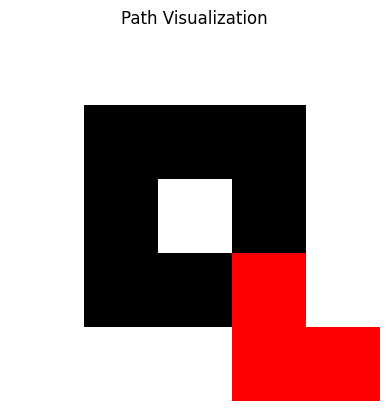

In [ ]:
Created using Colab. This will find paths between any two points if there exists a path to traverse. Also find two paths for any given pairs of points if there is a path exists without intersecting each other. This used BFS(Breadth First Search) algorithm.# Example using 'small-ring.png' image
# For testing different end points, one hass to change the start and end coordinates

img = load_binary_image("/content/small-ring.png")

# Define a list of start and end point pairs
points_to_check = [
    ((1, 1), (3, 3)),
    ((1, 1), (1, 3)), # Added a valid path
    ((3, 3), (4, 4)) # Added another valid path
]

print("Checking for paths in small-ring.png:")
for start, end in points_to_check:
    path = bfs_path(img, start, end)
    if path:
        print(f"Path exists between {start} and {end}!")
        draw_path(img, path, f"path_{start[0]}_{start[1]}_to_{end[0]}_{end[1]}.png")
    else:
        print(f"No path found between {start} and {end}.")

Checking for paths in bars.png:
No path found between (1, 1) and (3, 3).
Path exists between (1, 1) and (1, 10)!


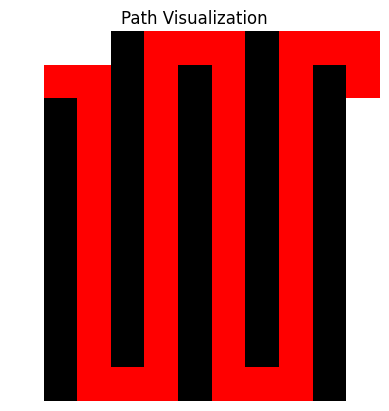

No path found between (5, 5) and (5, 15).


In [ ]:
# Example using 'bars.png' image
img = load_binary_image("/content/bars.png")

# Define a list of start and end point pairs for bars.png
points_to_check_bars = [
    ((1, 1), (3, 3)), # Expected: No path
    ((1, 1), (1, 10)), # Expected: Path
    ((5, 5), (5, 15)) # Expected: Path
]

print("Checking for paths in bars.png:")
for start, end in points_to_check_bars:
    path = bfs_path(img, start, end)
    if path:
        print(f"Path exists between {start} and {end}!")
        draw_path(img, path, f"path_bars_{start[0]}_{start[1]}_to_{end[0]}_{end[1]}.png")
    else:
        print(f"No path found between {start} and {end}.")

Checking for paths in polygons.png:
Path exists between (1, 1) and (3, 3)!


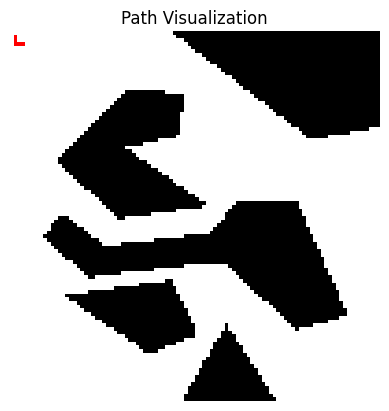

Path exists between (5, 5) and (50, 50)!


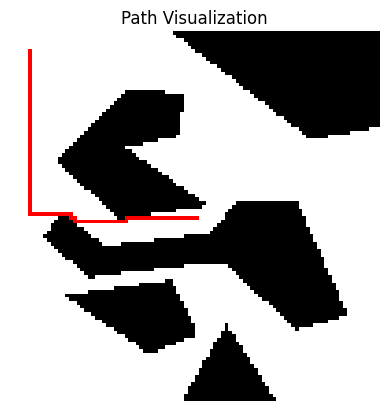

Path exists between (10, 10) and (80, 80)!


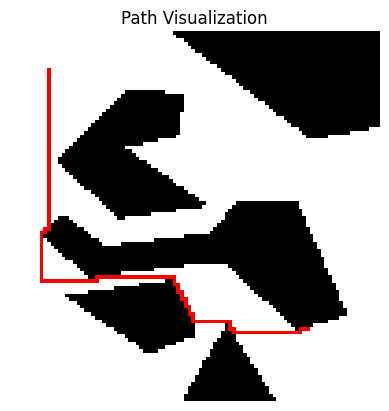

In [ ]:
# Example using 'polygons.png' image
img = load_binary_image("/content/polygons.png")

# Define a list of start and end point pairs for polygons.png
points_to_check_polygons = [
    ((1, 1), (3, 3)),  # Example: Path exists
    ((5, 5), (50, 50)), # Example: Path exists
    ((10, 10), (80, 80)) # Example: Path exists
]

print("Checking for paths in polygons.png:")
for start, end in points_to_check_polygons:
    path = bfs_path(img, start, end)
    if path:
        print(f"Path exists between {start} and {end}!")
        draw_path(img, path, f"path_polygons_{start[0]}_{start[1]}_to_{end[0]}_{end[1]}.png")
    else:
        print(f"No path found between {start} and {end}.")

Checking for two disjoint paths in polygons.png:

Checking disjoint paths for: ((10, 10) to (10, 45)) and ((10, 46) to (70, 55))
Both disjoint paths found!


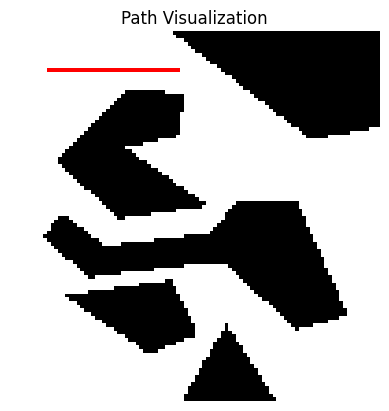

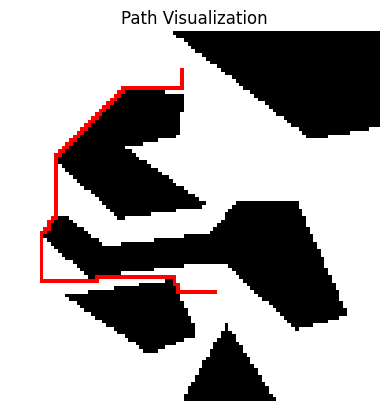


Checking disjoint paths for: ((1, 1) to (50, 50)) and ((5, 5) to (60, 60))
Could not find two disjoint paths.

Checking disjoint paths for: ((1, 1) to (3, 3)) and ((90, 90) to (95, 95))
Both disjoint paths found!


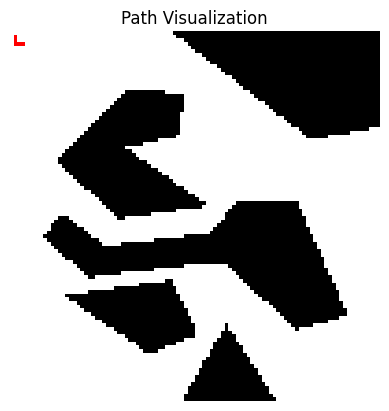

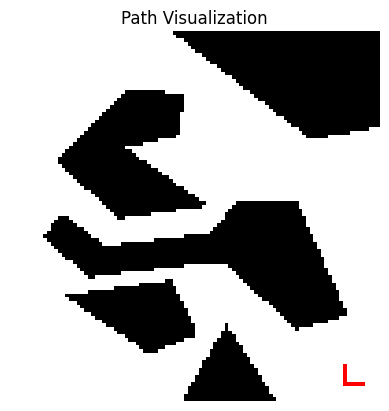

In [ ]:
# Two disjoint path example
img = load_binary_image("/content/polygons.png")

# Define a list of sets of start and end points to check for disjoint paths
disjoint_points_to_check = [
    # Case 1: Disjoint paths expected
    ((10, 10), (10, 45), (10, 46), (70, 55)),
    # Case 2: No disjoint paths expected (paths will likely overlap)
    ((1, 1), (50, 50), (5, 5), (60, 60)),
    # Case 3: One or both individual paths might not exist
    ((1, 1), (3, 3), (90, 90), (95, 95))
]

print("Checking for two disjoint paths in polygons.png:")
for s1, e1, s2, e2 in disjoint_points_to_check:
    print(f"\nChecking disjoint paths for: ({s1} to {e1}) and ({s2} to {e2})")
    p1, p2 = find_two_disjoint_paths(img, s1, e1, s2, e2)

    if p1 and p2:
        print("Both disjoint paths found!")
        draw_path(img, p1, f"path1_{s1[0]}_{s1[1]}_{e1[0]}_{e1[1]}.png")
        draw_path(img, p2, f"path2_{s2[0]}_{s2[1]}_{e2[0]}_{e2[1]}.png")
    else:
        print("Could not find two disjoint paths.")